# [ExAc data](http://blog.goldenhelix.com/grudy/exac-cnvs-the-first-large-scale-public-exome-cnv-variant-set/)
* Overview
* Analysis of CNV scores
     * Distribution of CNV scores in ExAc deletions and duplications 
         * Histograms and density plots
         * Cumulative frequency distriobution
         * CNV scores in each chromosome
* Analysis of CNV length

In [1]:
import pandas as pd
import pysam
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
sns.set(style="ticks")
plt.style.use(u'ggplot')
%matplotlib inline
sys.path.append("/Users/pubudu/Documents/MyGithub/my_modules/")
import ecdf, ffind, fgenes

In [2]:
exac = pd.concat([pd.read_table("ExAC_deletions.bed", names=['chr', 'start', 'end', 'population', 'score', 'strand', 'x1', 'x2', 'x3'], skiprows=1).assign(cns="del"),
 pd.read_table("ExAC_duplications.bed", names=['chr', 'start', 'end', 'population', 'score', 'strand', 'x1', 'x2', 'x3'], skiprows=1).assign(cns="dup")])
exac.head()

,chr,start,end,population,score,strand,x1,x2,x3,cns
0,chr1,65830315,67562009,ExAC-FIN,99,.,65830315,67562009,371,del
1,chr1,67091527,67148057,ExAC-NFE,99,.,67091527,67148057,5541316,del
2,chr1,33490040,33585788,ExAC-AMR,99,.,33490040,33585788,15794209,del
3,chr1,33490040,33585788,ExAC-NFE,99,.,33490040,33585788,5541316,del
4,chr1,33549518,33562475,ExAC-SAS,63,.,33549518,33562475,16286232,del


In [3]:
exac.head()

,chr,start,end,population,score,strand,x1,x2,x3,cns
0,chr1,65830315,67562009,ExAC-FIN,99,.,65830315,67562009,371,del
1,chr1,67091527,67148057,ExAC-NFE,99,.,67091527,67148057,5541316,del
2,chr1,33490040,33585788,ExAC-AMR,99,.,33490040,33585788,15794209,del
3,chr1,33490040,33585788,ExAC-NFE,99,.,33490040,33585788,5541316,del
4,chr1,33549518,33562475,ExAC-SAS,63,.,33549518,33562475,16286232,del


In [4]:
exac = exac.drop(columns=['x1', 'x2', 'x3'])

In [5]:
exac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126771 entries, 0 to 77361
Data columns (total 7 columns):
chr           126771 non-null object
start         126771 non-null int64
end           126771 non-null int64
population    126771 non-null object
score         126771 non-null int64
strand        126771 non-null object
cns           126771 non-null object
dtypes: int64(3), object(4)
memory usage: 7.7+ MB


## Overview
* Number of deletions and duplications
* Deletions and duplications in each population

In [6]:
print (f"Number of deletions in ExAc dataset {len(exac[exac['cns']=='del'])}")
print (f"Number of duplications in ExAc dataset {len(exac[exac['cns']=='dup'])}")

Number of deletions in ExAc dataset 49409
Number of duplications in ExAc dataset 77362


In [7]:
exac.groupby(by=['cns', 'population']).size()

cns  population
del  ExAC-AFR       7103
     ExAC-AMR       3441
     ExAC-EAS       3665
     ExAC-FIN       2472
     ExAC-NFE      26331
     ExAC-OTH        425
     ExAC-SAS       5972
dup  ExAC-AFR      10814
     ExAC-AMR       6425
     ExAC-EAS       6395
     ExAC-FIN       3122
     ExAC-NFE      38274
     ExAC-OTH        606
     ExAC-SAS      11726
dtype: int64

Text(0,0.5,'Count')

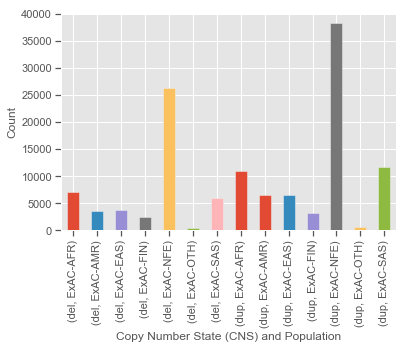

In [8]:
exac.groupby(by=['cns', 'population']).size().plot.bar(stacked=True)
plt.xlabel("Copy Number State (CNS) and Population")
plt.ylabel("Count")

Text(0.5,1,'CNV counts in each population')

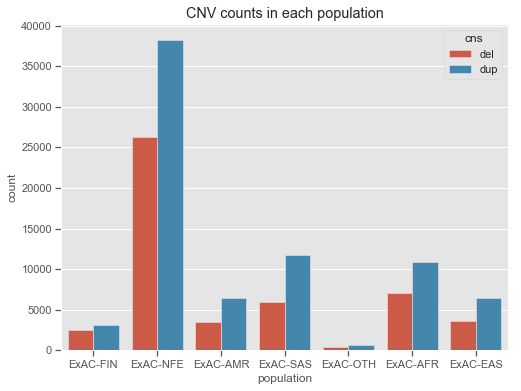

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="population", hue="cns", data=exac)
plt.title("CNV counts in each population")

## Analysis of CNV score
* [This BED file contains the final set of high quality CNV calls (SQ>60) from the initial Exome Aggregation Consortium CNV work (Ruderfer et al. Nature Genetics 2016)](ftp://ftp.broadinstitute.org/pub/ExAC_release/release0.3.1/cnv/README.cnv_bed)


In [10]:
exac['score'].describe()

count    126771.000000
mean         90.399476
std          11.147495
min          60.000000
25%          89.000000
50%          95.000000
75%          98.000000
max          99.000000
Name: score, dtype: float64

### CNV scores in deletions and duplications - histograms and density plots

Text(0,0.5,'Count')

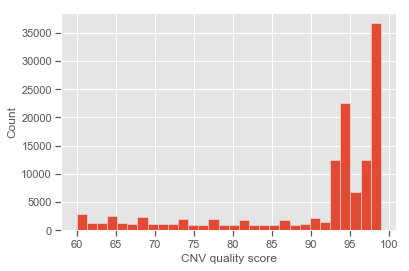

In [11]:
exac['score'].hist(bins=30)
plt.xlabel("CNV quality score")
plt.ylabel("Count")

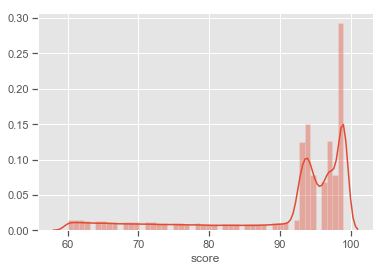

In [12]:
sns.distplot(exac['score'], hist=True)

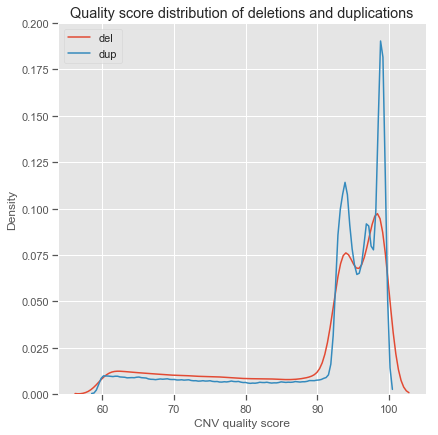

In [13]:
## Distribution of CNV quality scores in deletions and duplications
sns.FacetGrid(exac, hue="cns", height=6, aspect=1).map(sns.distplot, "score", hist=False)
plt.title("Quality score distribution of deletions and duplications")
plt.xlabel("CNV quality score")
plt.ylabel("Density")
plt.legend()

### CNV scores in deletions and duplications - cumulative frequency distriobution

Text(0,0.5,'Cumulative frequency')

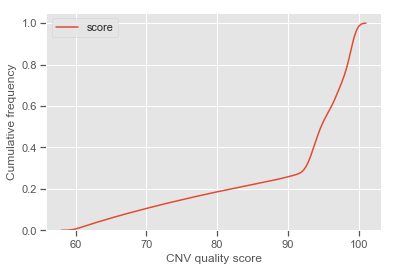

In [14]:
sns.kdeplot(exac['score'], cumulative=True);
plt.xlabel("CNV quality score")
plt.ylabel("Cumulative frequency")

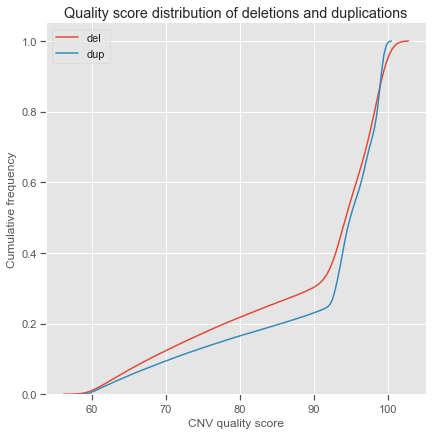

In [15]:
sns.FacetGrid(exac, hue="cns", height=6, aspect=1).map(sns.kdeplot, "score", cumulative=True)
#sns.kdeplot(exac['score'], cumulative=True, hue=exac['cns']);
plt.title("Quality score distribution of deletions and duplications")
plt.xlabel("CNV quality score")
plt.ylabel("Cumulative frequency")
plt.legend()

In [16]:
exac.head()

,chr,start,end,population,score,strand,cns
0,chr1,65830315,67562009,ExAC-FIN,99,.,del
1,chr1,67091527,67148057,ExAC-NFE,99,.,del
2,chr1,33490040,33585788,ExAC-AMR,99,.,del
3,chr1,33490040,33585788,ExAC-NFE,99,.,del
4,chr1,33549518,33562475,ExAC-SAS,63,.,del


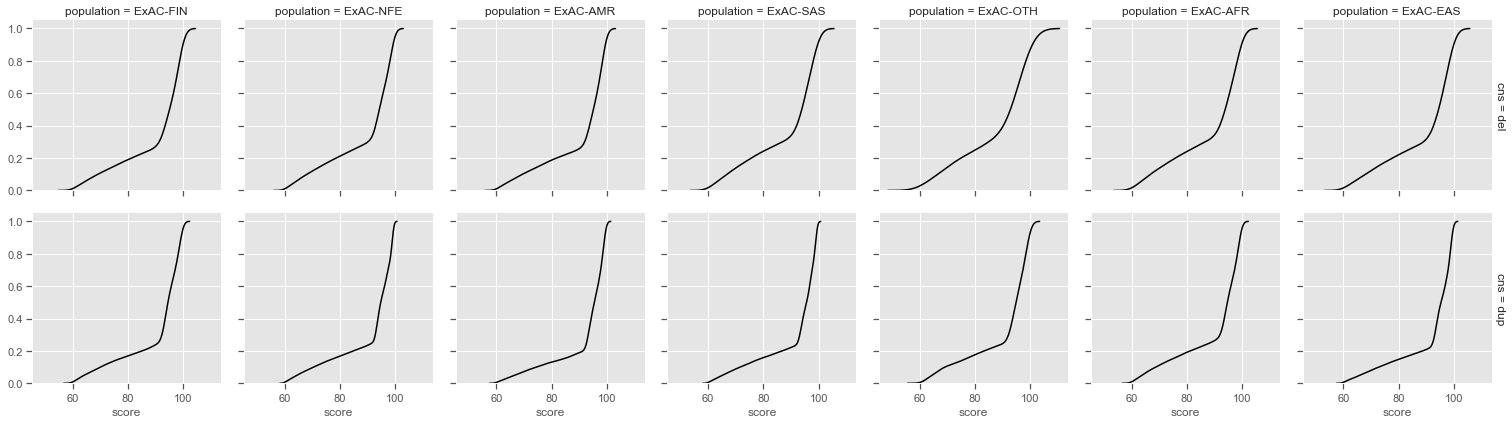

In [17]:
g = sns.FacetGrid(exac, row="cns", col="population", margin_titles=True)
g.map(sns.kdeplot, "score", cumulative=True, color='black');

Text(0.5,0.98,'Quality score distribution of deletions and duplications in each population')

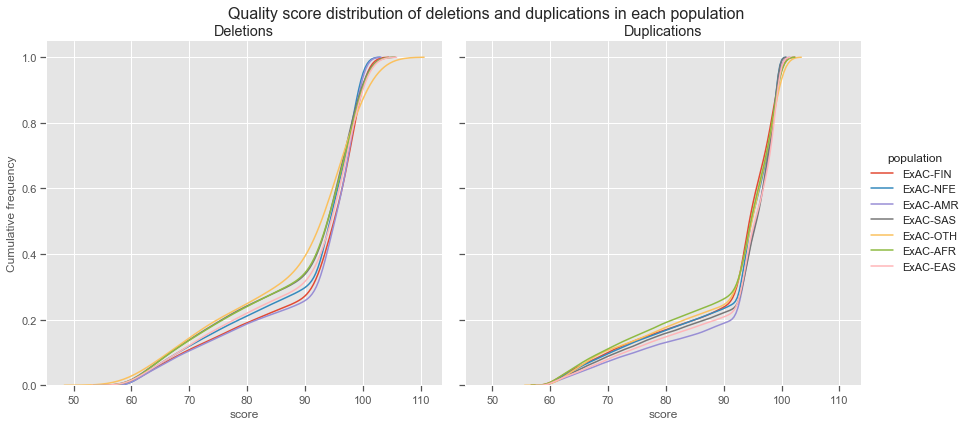

In [18]:
g = sns.FacetGrid(exac, col="cns", col_order=["del", "dup"], hue="population", height=6, aspect=1, sharey=True)
g.map(sns.kdeplot, "score", cumulative=True)
g.axes[0,0].set_ylabel("Cumulative frequency")
g.axes[0,0].set_title("Deletions")
g.axes[0,1].set_title("Duplications")
g.add_legend()
plt.subplots_adjust(top=0.9) # the top of the subplots of the figure
g.fig.suptitle("Quality score distribution of deletions and duplications in each population", fontsize=16)

### CNV scores in each chromosome

Text(0.5,1,'Distribution of CNV scores in each chromosome')

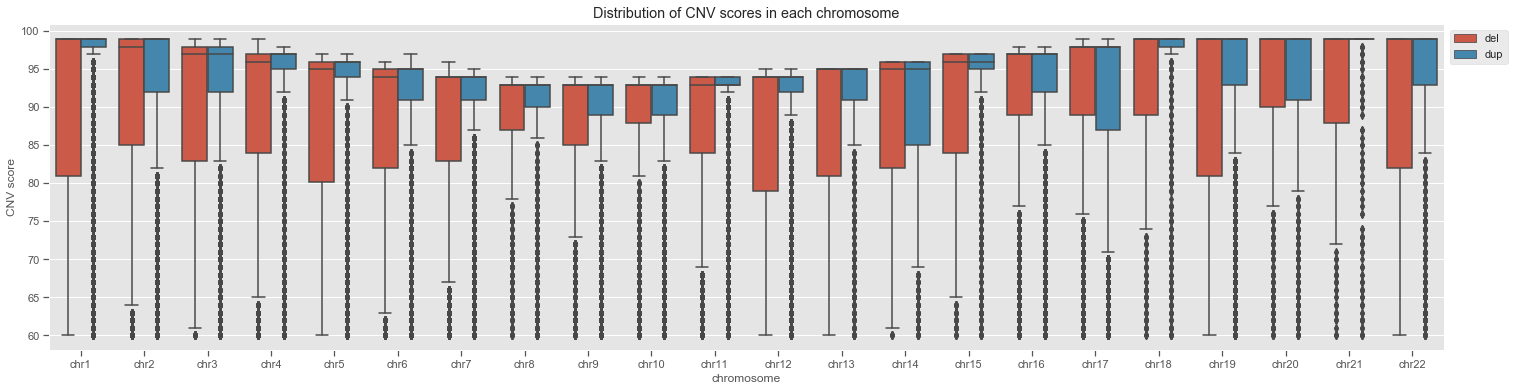

In [19]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="chr", y="score", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("chromosome")
plt.ylabel("CNV score")
plt.title("Distribution of CNV scores in each chromosome")

## Analysis of CNV length

In [20]:
exac['Len_inKb'] = exac.apply(lambda x: (x['end']-x['start'])/1000, axis=1)
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957


### CNV length in deletions and duplications - Density plots

Text(0.5,1,'CNV length distribution')

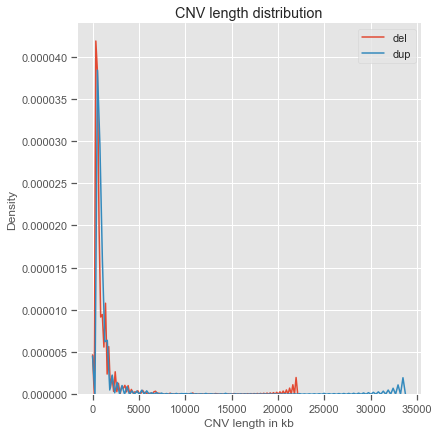

In [21]:
## Density plots
sns.FacetGrid(exac, hue="cns", height=6, aspect=1).map(sns.distplot, "Len_inKb", hist=False)
#sns.kdeplot(exac['score'], cumulative=True, hue=exac['cns']);
plt.xlabel("CNV length in kb")
plt.ylabel("Density")
plt.legend()
plt.title("CNV length distribution")

In [22]:
x_trim_threshold = 99

In [23]:
np.percentile(exac['Len_inKb'], x_trim_threshold)

873.29499999999996

Text(0.5,1,'CNV length distribution (after excluding the top 1%)')

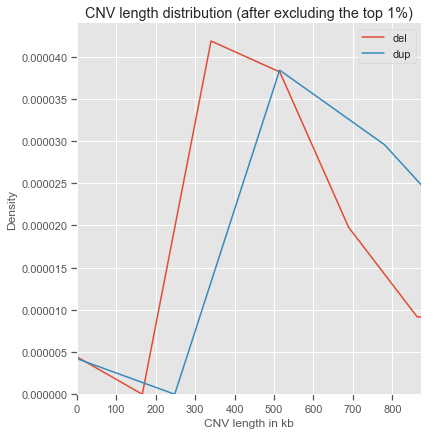

In [24]:
sns.FacetGrid(exac, hue="cns", height=6, aspect=1).map(sns.distplot, "Len_inKb", hist=False)
#sns.kdeplot(exac['score'], cumulative=True, hue=exac['cns']);
plt.xlabel("CNV length in kb")
plt.ylabel("Density")
plt.legend()
plt.xlim(0,int(np.percentile(exac['Len_inKb'], x_trim_threshold)))
plt.title(f"CNV length distribution (after excluding the top {100-x_trim_threshold}%)")

In [25]:
exac['LogLen_inKb'] = exac.apply(lambda x: np.log10((x['end']-x['start'])/1000), axis=1)
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504


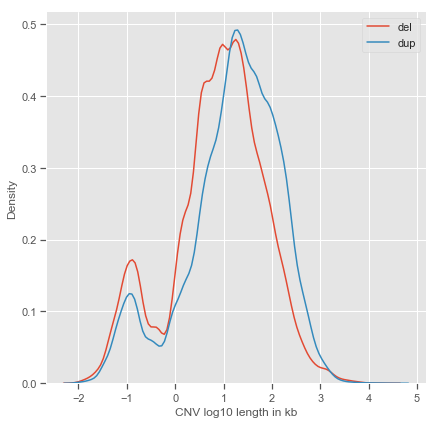

In [26]:
sns.FacetGrid(exac, hue="cns", height=6, aspect=1).map(sns.distplot, "LogLen_inKb", hist=False)
#sns.kdeplot(exac['score'], cumulative=True, hue=exac['cns']);
plt.xlabel("CNV log10 length in kb")
plt.ylabel("Density")
plt.legend()

### CNV length in deletions and duplications - cumulative frequency distribution plots

Text(0.5,0.98,'CNV length distribution in each population')

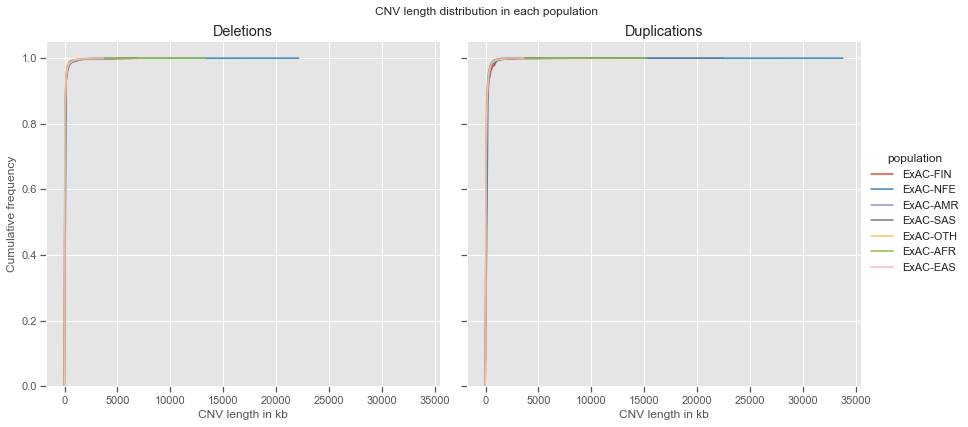

In [27]:
g = sns.FacetGrid(exac, col="cns", col_order=["del", "dup"], hue="population", height=6, aspect=1, sharey=True)
g.map(sns.kdeplot, "Len_inKb", cumulative=True)
g.axes[0,0].set_ylabel("Cumulative frequency")
g.axes[0,0].set_xlabel("CNV length in kb")
g.axes[0,1].set_xlabel("CNV length in kb")
g.axes[0,0].set_title("Deletions")
g.axes[0,1].set_title("Duplications")
g.add_legend()
plt.subplots_adjust(top=0.9) # the top of the subplots of the figure
g.fig.suptitle("CNV length distribution in each population")

(0, 873)

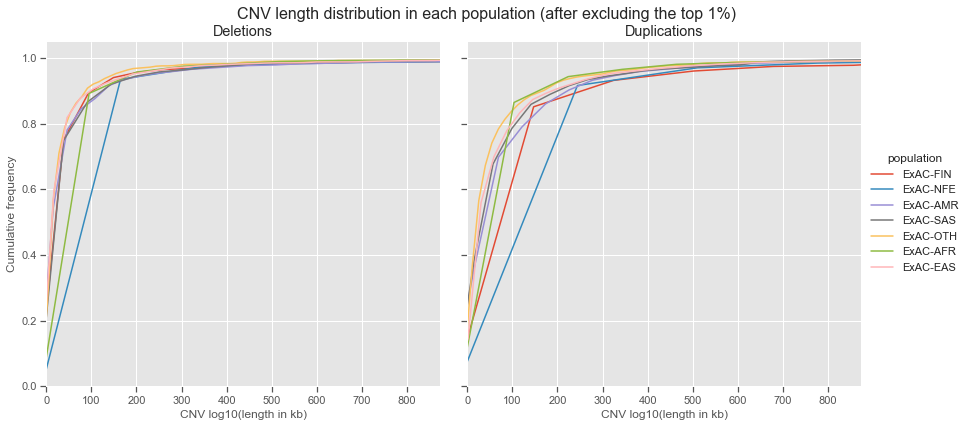

In [28]:
g = sns.FacetGrid(exac, col="cns", col_order=["del", "dup"], hue="population", height=6, aspect=1, sharey=True)
g.map(sns.kdeplot, "Len_inKb", cumulative=True)
g.axes[0,0].set_ylabel("Cumulative frequency")
g.axes[0,0].set_xlabel("CNV log10(length in kb)")
g.axes[0,1].set_xlabel("CNV log10(length in kb)")
g.axes[0,0].set_title("Deletions")
g.axes[0,1].set_title("Duplications")
g.add_legend()
plt.subplots_adjust(top=0.9) # the top of the subplots of the figure
g.fig.suptitle(f"CNV length distribution in each population (after excluding the top {100-x_trim_threshold}%)", fontsize=16)
plt.xlim(0,int(np.percentile(exac['Len_inKb'], x_trim_threshold)))

Text(0.5,0.98,'CNV length distribution in log10 (in each population)')

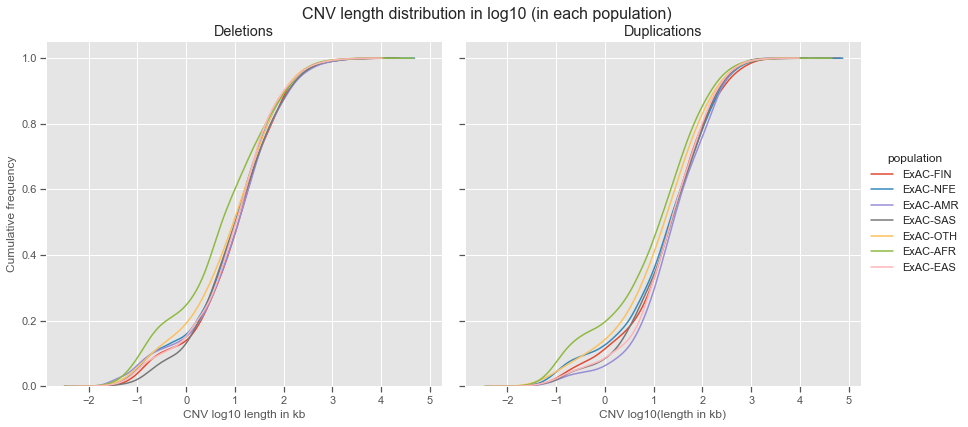

In [29]:
g = sns.FacetGrid(exac, col="cns", col_order=["del", "dup"], hue="population", height=6, aspect=1, sharey=True)
g.map(sns.kdeplot, "LogLen_inKb", cumulative=True)
g.axes[0,0].set_ylabel("Cumulative frequency")
g.axes[0,0].set_xlabel("CNV log10 length in kb")
g.axes[0,1].set_xlabel("CNV log10(length in kb)")
g.axes[0,0].set_title("Deletions")
g.axes[0,1].set_title("Duplications")
g.add_legend()
plt.subplots_adjust(top=0.9) # the top of the subplots of the figure
g.fig.suptitle(f"CNV length distribution in log10 (in each population)", fontsize=16)

### CNV length in each chromosome 

Text(0.5,1,'CNV length distribution in log10 (in each chromosome)')

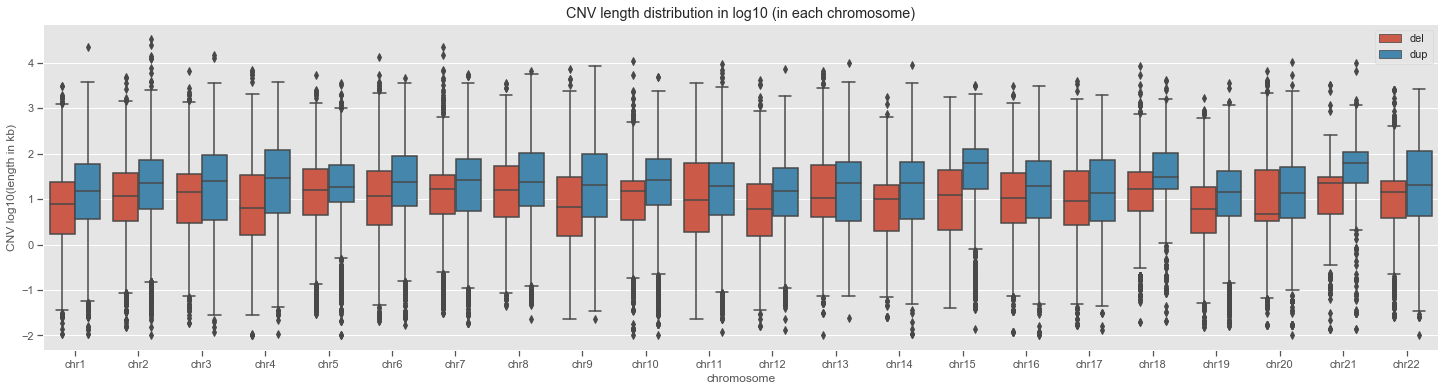

In [30]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="chr", y="LogLen_inKb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("chromosome")
plt.ylabel("CNV log10(length in kb)")
plt.title("CNV length distribution in log10 (in each chromosome)")

(0, 168)

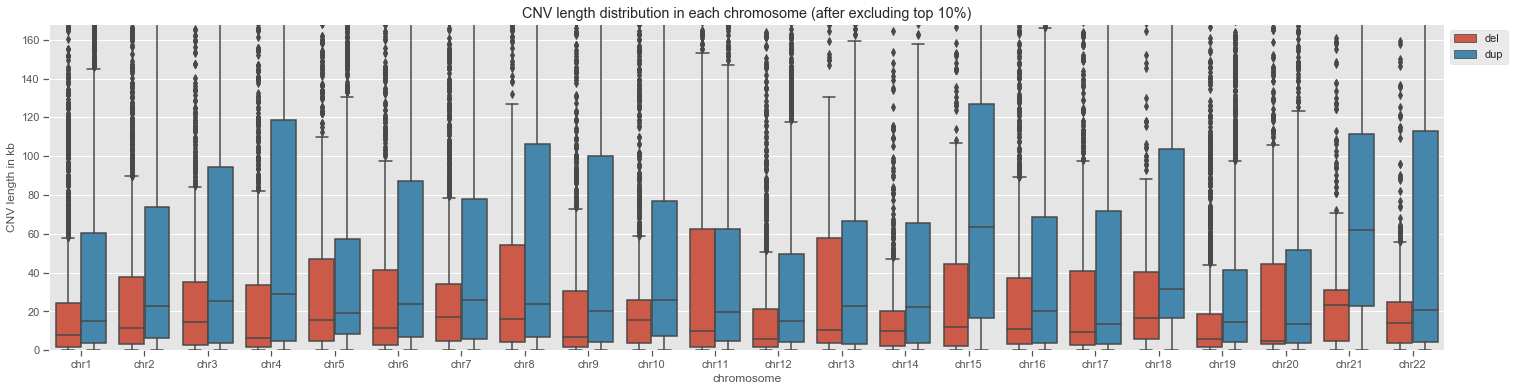

In [31]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="chr", y="Len_inKb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("chromosome")
plt.ylabel("CNV length in kb")
plt.title("CNV length distribution in each chromosome (after excluding top 10%)")
plt.ylim(0,int(np.percentile(exac['Len_inKb'], 90)))

## Analysis of CNV length and quality scores

In [32]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504


Text(0.5,1,'Correlation of CNV length and score')

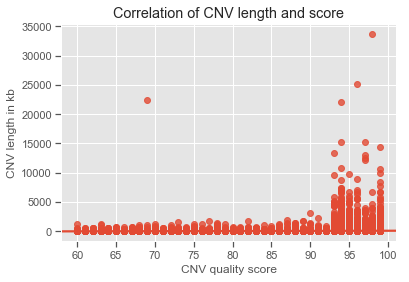

In [33]:
sns.regplot(x="score", y="Len_inKb", data=exac);
plt.xlabel("CNV quality score")
plt.ylabel("CNV length in kb")
plt.title("Correlation of CNV length and score")

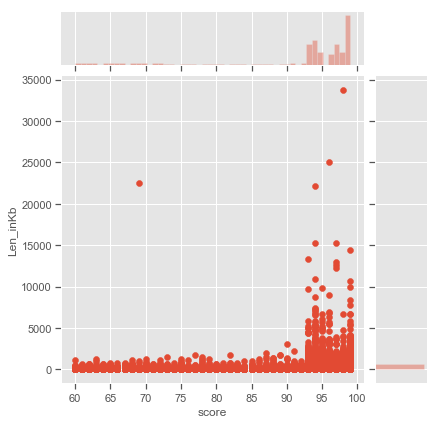

In [34]:
sns.jointplot(x="score", y="Len_inKb", data=exac);

Text(0.5,1,'Correlation of log10(length) and CNV score ')

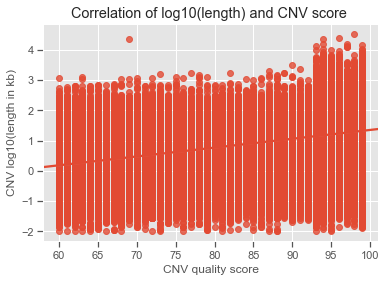

In [35]:
sns.regplot(x="score", y="LogLen_inKb", data=exac);
plt.xlabel("CNV quality score")
plt.ylabel("CNV log10(length in kb)")
plt.title("Correlation of log10(length) and CNV score ")

### Binning CNVs based on quality scores

In [36]:
print (f"Minimum score: {min(exac['score'])}, maximum score: {max(exac['score'])}, \
        range:{list(range(min(exac['score']), max(exac['score']+10), 10 ))}")

Minimum score: 60, maximum score: 99,         range:[60, 70, 80, 90, 100]


In [37]:
score_bins = list(range(min(exac['score']), max(exac['score']+10), 10 ))
score_bins

[60, 70, 80, 90, 100]

In [38]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504


In [39]:
exac['s_bin'] = pd.cut(exac['score'], bins=score_bins, labels=score_bins[:-1])
#exac.head(20)

In [40]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279,90
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130,90
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130,90
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504,60


Text(0.5,1,'Distribution of CNV length in each quality score category (after excluding top 10%)')

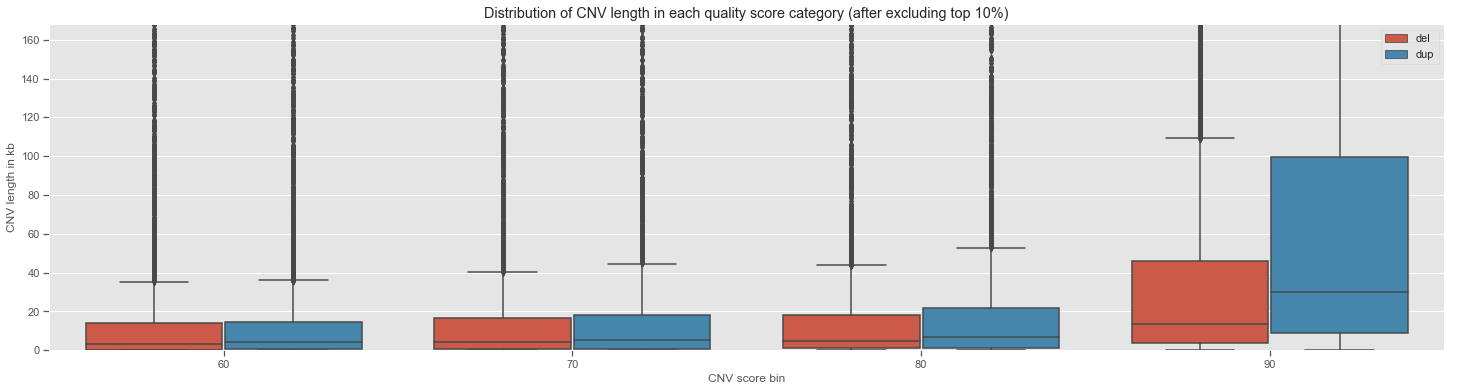

In [41]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="s_bin", y="Len_inKb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("CNV score bin")
plt.ylabel("CNV length in kb")
plt.ylim(0,int(np.percentile(exac['Len_inKb'], 90)))
plt.title("Distribution of CNV length in each quality score category (after excluding top 10%)")

Text(0.5,1,'Distribution of CNV length in each quality score category')

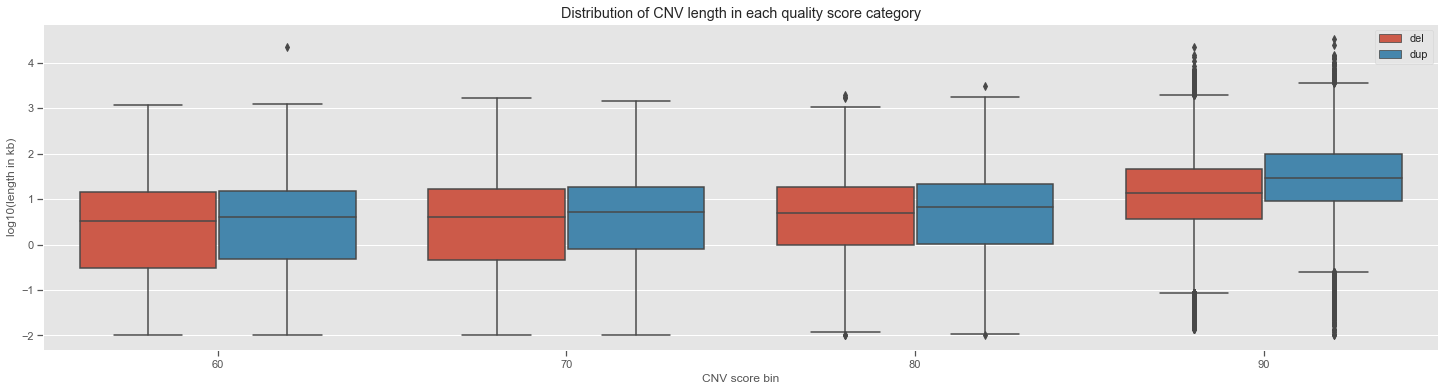

In [42]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="s_bin", y="LogLen_inKb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("CNV score bin")
plt.ylabel("log10(length in kb)")
plt.title("Distribution of CNV length in each quality score category")

Text(0.5,1,'Distribution of CNV length in each quality score category')

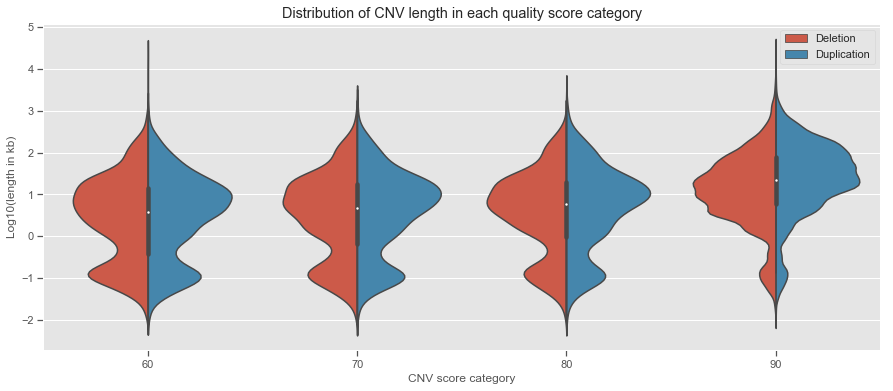

In [43]:
plt.figure(figsize=(15, 6))
g = sns.violinplot(x="s_bin", y="LogLen_inKb", hue="cns", data=exac, split=True, legend=False)
g.set_title("CNV length distribution in different CNV quality score categories")
g.set_xlabel("CNV score category")
g.set_ylabel("Log10(length in kb)")
handles, labels = g.get_legend_handles_labels()
plt.legend(handles, ["Deletion", "Duplication"])
plt.title("Distribution of CNV length in each quality score category")

### Binning CNVs based on length

In [44]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279,90
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130,90
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130,90
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504,60


In [45]:
print (f"Minimum score: {min(exac['Len_inKb'])}, maximum score: {max(exac['Len_inKb'])}, \
        range:{list(range(int(min(exac['Len_inKb'])), int(max(exac['Len_inKb']+10)), 1000 ))}")

Minimum score: 0.01, maximum score: 33753.656,         range:[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000]


In [46]:
len_bins = list(range(int(min(exac['Len_inKb'])), 10000, 1000 ))
len_bins[:5]

[0, 1000, 2000, 3000, 4000]

In [47]:
len(len_bins)

10

In [48]:
exac['l_bin'] = pd.cut(exac['Len_inKb'], bins=len_bins, labels=len_bins[:-1])
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin,l_bin
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90,1000
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279,90,0
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130,90,0
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130,90,0
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504,60,0


Text(0.5,1,'Distribution of CNV score in each length category')

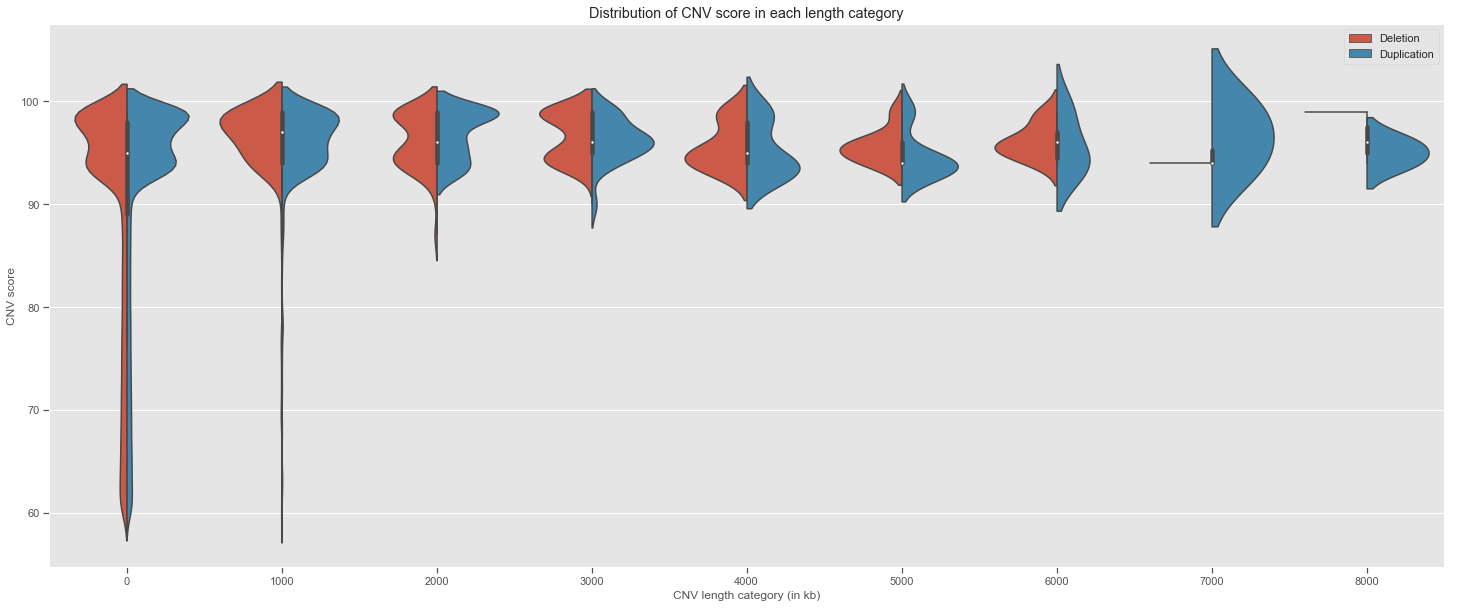

In [49]:
plt.figure(figsize=(25,10))
g = sns.violinplot(x="l_bin", y="score", hue="cns", data=exac, split=True, legend=False)
g.set_title("CNV score distribution in different length categories")
g.set_xlabel("CNV length category (in kb)")
g.set_ylabel("CNV score")
handles, labels = g.get_legend_handles_labels()
plt.legend(handles, ["Deletion", "Duplication"])
plt.title("Distribution of CNV score in each length category")

## Annotating genes in the CNV regions

In [50]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin,l_bin
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90,1000
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279,90,0
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130,90,0
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130,90,0
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504,60,0


In [51]:
gencode_v19 = pysam.TabixFile('/Users/pubudu/Documents/RefData/Gencode/tabix_files/gencode.v19.annotation.gff3_all_known_genes.txt.sorted.formatted.txt.gz')
exac[:10].apply(lambda x: fgenes.gencode_gene_search(x, gencode_v19), axis=1)

0    DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...
1                             SGIP1;MIR3117;AL139147.1
2                                              AK2;ADC
3                                              AK2;ADC
4                                                  ADC
5                                     TGFBR3;RN7SL653P
6                                     TGFBR3;RN7SL653P
7    ATP1A1;ATP1A1OS;RNU6-817P;CD58;MIR548AC;IGSF3;...
8    SDE2;H3F3A;ACBD3;MIXL1;LIN9;PARP1;RN7SKP165;C1...
9    RERE;SNORA77;ENO1;RNU6-304P;CA6;RN7SL451P;SLC2...
dtype: object

In [52]:
exac['genes'] = exac.apply(lambda x: fgenes.gencode_gene_search(x, gencode_v19), axis=1)

In [53]:
exac.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin,l_bin,genes
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90,1000,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...
1,chr1,67091527,67148057,ExAC-NFE,99,.,del,56.530,1.752279,90,0,SGIP1;MIR3117;AL139147.1
2,chr1,33490040,33585788,ExAC-AMR,99,.,del,95.748,1.981130,90,0,AK2;ADC
3,chr1,33490040,33585788,ExAC-NFE,99,.,del,95.748,1.981130,90,0,AK2;ADC
4,chr1,33549518,33562475,ExAC-SAS,63,.,del,12.957,1.112504,60,0,ADC


In [54]:
new_rows = []
for i,r in exac.iterrows():
    g_list = r['genes'].split(";")
    for g in g_list:
        g = g.replace(" ","")
        new_rows.append(np.append(r[['chr', 'start', 'end', 'population', 'score', 'strand', 'cns', "Len_inKb", "LogLen_inKb", "s_bin", "l_bin", "genes"]].values, g))
        
df_perGene = pd.DataFrame()
df_perGene = df_perGene.append(pd.DataFrame(new_rows, columns=['chr', 'start', 'end', 'population', 'score', 'strand', 'cns', "Len_inKb", "LogLen_inKb", "s_bin", "l_bin", "genes", 'gene_ID'])).reset_index().drop('index', axis=1)
df_perGene.head()

,chr,start,end,population,score,strand,cns,Len_inKb,LogLen_inKb,s_bin,l_bin,genes,gene_ID
0,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90.0,1000.0,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...,DNAJC6
1,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90.0,1000.0,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...,RNU2-15P
2,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90.0,1000.0,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...,LEPR
3,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90.0,1000.0,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...,LEPROT
4,chr1,65830315,67562009,ExAC-FIN,99,.,del,1731.694,3.238471,90.0,1000.0,DNAJC6;RNU2-15P;LEPR;LEPROT;RN7SL854P;PDE4B;RN...,RN7SL854P


In [55]:
df_perGene = df_perGene.drop(columns=['strand', 'LogLen_inKb', 's_bin', 'l_bin', 'genes'])
df_perGene.head()

,chr,start,end,population,score,cns,Len_inKb,gene_ID
0,chr1,65830315,67562009,ExAC-FIN,99,del,1731.694,DNAJC6
1,chr1,65830315,67562009,ExAC-FIN,99,del,1731.694,RNU2-15P
2,chr1,65830315,67562009,ExAC-FIN,99,del,1731.694,LEPR
3,chr1,65830315,67562009,ExAC-FIN,99,del,1731.694,LEPROT
4,chr1,65830315,67562009,ExAC-FIN,99,del,1731.694,RN7SL854P


In [56]:
gene_counts = df_perGene.groupby('gene_ID').size().sort_values(ascending=False).to_frame().rename(columns={0:'count'}).reset_index()
gene_counts.head()

,gene_ID,count
0,ANKRD36C,1207
1,MGAM,688
2,PDE4DIP,596
3,PLEKHA5,543
4,NA,541


Text(0.5,1,'Top 25 genes that overlap with given CNV dataset')

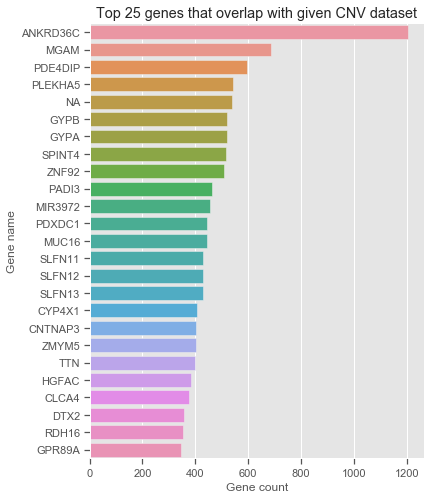

In [57]:
plt.figure(figsize=(6,8))
sns.barplot(y="gene_ID", x="count", data=gene_counts.sort_values(by='count', ascending=False)[:25])
plt.xlabel("Gene count")
plt.ylabel("Gene name")
plt.title("Top 25 genes that overlap with given CNV dataset")